## Case Study 2 (Customer Orders) - Harsh Atha

### The dataset contains data for 2015, 2016 and 2017. Current year assumed to be 2017 and previous year as 2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("casestudy.csv",index_col=0)
df["customer_email"] = df["customer_email"].str.strip()

In [3]:
df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  object 
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.9+ MB


In [5]:
df_2015=df[df["year"]==2015]
df_2016=df[df["year"]==2016]
df_2017=df[df["year"]==2017]

In [6]:
df_2016.head()

,customer_email,net_revenue,year
231294,mwrossuukz@gmail.com,197.26,2016
231295,gkwsoupawk@gmail.com,38.28,2016
231296,vlyigtgfzs@gmail.com,154.57,2016
231297,yfirychuhk@gmail.com,102.47,2016
231298,trnzgqinuu@gmail.com,32.03,2016


In [7]:
df_2017.head()

,customer_email,net_revenue,year
435940,mwrossuukz@gmail.com,96.61,2017
435941,qvjfterwnk@gmail.com,176.00,2017
435942,vlyigtgfzs@gmail.com,73.47,2017
435943,yfirychuhk@gmail.com,138.17,2017
435944,fdkiioqtli@gmail.com,156.87,2017


#### Revenue for current year 2017

In [8]:
curr_year_revenue = round(df_2017["net_revenue"].sum(),2)

In [9]:
print("The total revenue generated for the current year i.e 2017 is ", curr_year_revenue)

The total revenue generated for the current year i.e 2017 is  31417495.03


In [10]:
new_customer = df_2017[~df_2017["customer_email"].isin(df_2016["customer_email"])]
new_customer_revenue=round(new_customer["net_revenue"].sum(),2)

In [11]:
print("The new customer revenue generated i.e for customers obtained in 2017 not present in 2016 is ", new_customer_revenue)

The new customer revenue generated i.e for customers obtained in 2017 not present in 2016 is  21769213.01


#### Existing Customer Growth. (Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year)

In [12]:
existing_customer_data_2017 = df_2017[df_2017["customer_email"].isin(df_2016["customer_email"])]
existing_customer_data_2016 = df_2016[df_2016["customer_email"].isin(existing_customer_data_2017["customer_email"])]

In [13]:
existing_customer_growth = round(existing_customer_data_2017["net_revenue"].sum()- existing_customer_data_2016["net_revenue"].sum(),2)

In [14]:
print("The existing customer growth for the year 2017 is ", existing_customer_growth)


The existing customer growth for the year 2017 is  63857.06


#### Revenue lost from attrition. (This is assuming that the value required here is revenue lost from customers that were present in 2016 but not in 2017.)

In [15]:
cust_data_lost_2017 = df_2016[~df_2016["customer_email"].isin(df_2017["customer_email"])]
attrition_lost_revenue=cust_data_lost_2017["net_revenue"].sum()


In [16]:
print("The revenue lost due to attrition i.e revenue lost from customers present in 2016 but not in 2017 is ", attrition_lost_revenue)

The revenue lost due to attrition i.e revenue lost from customers present in 2016 but not in 2017 is  16146518.63


#### Existing customer revenue current year (Revenue of Customers in 2017 that also existed in 2016)


In [17]:
print("The existing customer revenue of current year is ", round(existing_customer_data_2017["net_revenue"].sum(),2))

The existing customer revenue of current year is  9648282.02


#### Existing customer revenue prior year (Revenue of Customers in 2016 that also exist in 2017)


In [18]:
print("The existing customer revenue of previous year is ", round(existing_customer_data_2016["net_revenue"].sum(),2))

The existing customer revenue of previous year is  9584424.96


### Total Customers Current Year

In [19]:
total_cust_curr_year = df_2017["customer_email"].nunique()
print("The total customers present in the current year 2017 are ", total_cust_curr_year)

The total customers present in the current year 2017 are  249987


### Total Customers Previous Year i.e 2016

In [20]:
total_cust_prev_year = df_2016["customer_email"].nunique()
print("The total customers present in the previous year 2016 are ", total_cust_prev_year)

The total customers present in the previous year 2016 are  204646


#### New Customers list i.e (Customers Present in 2017 but not in 2016)

In [21]:
print("The count of new customers is ", new_customer["customer_email"].nunique(), "and the names are as follows: ")
print(new_customer["customer_email"].unique())

The count of new customers is  173449 and the names are as follows: 
['qvjfterwnk@gmail.com' 'fdkiioqtli@gmail.com' 'vpsfdhgrfo@gmail.com' ...
 'appaplmgko@gmail.com' 'wvkpmwsgck@gmail.com' 'aregboumbw@gmail.com']


#### Lost Customers i.e Customers present in 2016 but not in 2017

In [22]:
lost_customers = df_2016[~df_2016["customer_email"].isin(df_2017["customer_email"])]
print("The count of lost customers is ", lost_customers["customer_email"].nunique(), "and the names are as follows: ")
print(lost_customers["customer_email"].unique())

The count of lost customers is  128108 and the names are as follows: 
['gkwsoupawk@gmail.com' 'trnzgqinuu@gmail.com' 'hhxxpwlakg@gmail.com' ...
 'rdotspqdxi@gmail.com' 'pidugzoeej@gmail.com' 'kxqglfdktu@gmail.com']


### Visualizations on Dataset

In [23]:
df.year=df.year.astype("str")
cust_count = df.groupby("year")["customer_email"].agg("count").reset_index()
cust_count.head()

,year,customer_email
0,2015,231294
1,2016,204646
2,2017,249987


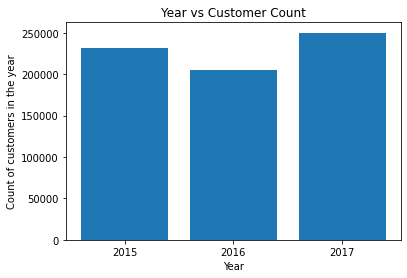

In [24]:
plt.bar(cust_count["year"],cust_count["customer_email"])
plt.xlabel("Year")
plt.ylabel("Count of customers in the year")
plt.title("Year vs Customer Count")
plt.show()

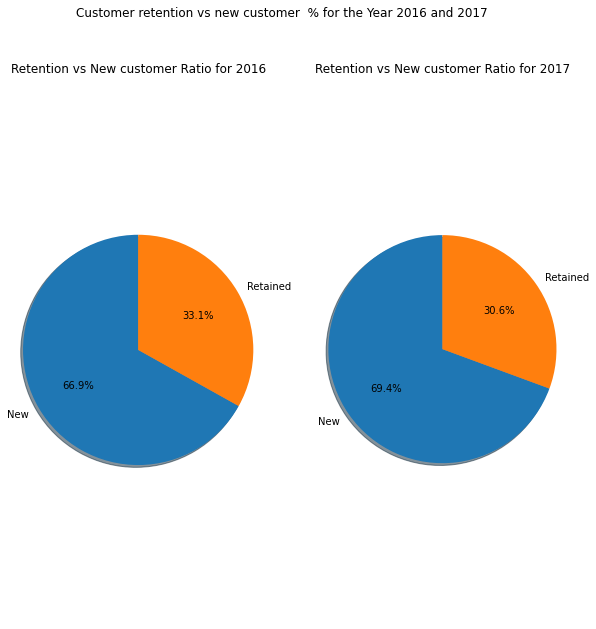

In [25]:
cust_retained_2016 = df_2016[df_2016["customer_email"].isin(df_2015["customer_email"])]["customer_email"].nunique()
cust_new_2016 = df_2016[~df_2016["customer_email"].isin(df_2015["customer_email"])]["customer_email"].nunique()


ratio_2016= pd.DataFrame({"Category":["New","Retained"],"Count":[cust_new_2016,cust_retained_2016]})
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(ratio_2016["Count"], labels=ratio_2016["Category"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Retention vs New customer Ratio for 2016", loc='center')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.title("Retention vs New customer Ratio for 2016")

cust_retained_2017 = existing_customer_data_2017["customer_email"].nunique()
cust_new_2017 = new_customer["customer_email"].nunique()


ratio_2017= pd.DataFrame({"Category":["New","Retained"],"Count":[cust_new_2017,cust_retained_2017]})

ax2.pie(ratio_2017["Count"], labels=ratio_2017["Category"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Retention vs New customer Ratio for 2017")



plt.suptitle("Customer retention vs new customer  % for the Year 2016 and 2017")
plt.show()
## Below plot shows the no of new customers vs the % customers retained for 2016 and 2017. Based on the comparison we can see that 2016 managed to 
## retain a higher percent of customers than 2017.

#### Additonally to these plots, if data was available for multiple years, we can create line graphs to get a trend line of revenue.
#### Another thing would be to create charts based on Churn Rate and the revenue. While the dataset is limited to 4 columns, based on questions answered we can create a multitude of visualizations.